# Google Cloud Natural Language API Demo
#### Further Documentation:
https://cloud.google.com/natural-language/docs
https://cloud.google.com/natural-language/docs/basics
https://cloud.google.com/natural-language/docs/how-to

## Introduction

The Natural Language API has several methods for performing analysis and annotation on your text. Each level of analysis provides valuable information for language understanding. These methods are listed below:

**Sentiment analysis** inspects the given text and identifies the prevailing emotional opinion within the text, especially to determine a writer's attitude as positive, negative, or neutral. This method returns the sentiment of the text as a whole as well as the sentiment of individual sentences within it. Sentiment analysis is performed through the analyzeSentiment method.

**Entity analysis** inspects the given text for known entities (Proper nouns such as public figures, landmarks, and so on. Common nouns such as restaurant, stadium, and so on.) and returns information about those entities. This includes a Wikipedia link (if applicable), the entity type and the salience (a measure of the relevance of the entity to the entire text). Entity analysis is performed with the analyzeEntities method.

**Entity sentiment analysis** inspects the given text for known entities (proper nouns and common nouns), returns information about those entities, and identifies the prevailing emotional opinion of the entity within the text, especially to determine a writer's attitude toward the entity as positive, negative, or neutral. An example of how this might be used is when presented with a sentence that contains a number of different emotions; for example, "I liked the food but the service was terrible". Entity analysis is performed with the analyzeEntitySentiment method.

**Syntactic analysis** extracts linguistic information, breaking up the given text into a series of sentences and tokens (generally, word boundaries), providing further analysis on those tokens. For each word in the text, the API tells you the word's part of speech (noun, verb, adjective, etc.) and how it relates to other words in the sentence. Syntactic Analysis is performed with the analyzeSyntax method.

**Content classification** analyzes text content and returns a content category for the content. Content classification is performed by using the classifyText method.

Each API call also detects and returns the language, if a language is not specified by the caller in the initial request. A full list of supported languages can be found here: https://cloud.google.com/natural-language/docs/languages

Additionally, if you wish to perform several natural language operations on given text using only one API call, the annotateText request can also be used to perform sentiment analysis and entity analysis.


## The Natural Language API: Set Up And Examples

#### Setup

Ensure you have enabled billing, the cloud natural language APIs, and have a service account before running this notebook. 

You may also need to restart your kernel ('Kernel' in the menu). 

In [49]:
pip install --user --upgrade google-cloud-language

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Import google-cloud-language
# Make sure that you have installed or upgraded to the latest google-cloud-language using pip
from google.cloud import language_v1 as language
import pandas as pd
#Print all columns and all rows in a panda dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [51]:
def read_document(filename):
    with open(filename, "r") as review_file:
            # Instantiates a plain text document.
            docContent = review_file.read()
    return docContent


#### Set up functions to call Google Natural Language API
Here are some examples of the API in action <br>
Sentiment Analysis:

In [52]:
# Code from Google at https://codelabs.developers.google.com/codelabs/cloud-natural-language-python3#7
# Probably would be better off changing all the functions to follow the Google standard ones from the codelab, and then making 
# small modifications to the rest of the code to make it all work together.

def analyze_text_sentiment(text):
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    results = dict(
        text=text,
        score=f"{sentiment.score:.1%}",
        magnitude=f"{sentiment.magnitude:.1%}",
    )
    
    # Get sentiment for all sentences in the document
    sentence_sentiment = []
    for sentence in response.sentences:
        item={}
        item["text"]=sentence.text.content
        item["sentiment score"]=sentence.sentiment.score
        item["sentiment magnitude"]=sentence.sentiment.magnitude
        sentence_sentiment.append(item)
    
    return sentence_sentiment

In [53]:
# Syntax Analysis
def gcp_analyze_syntax(text, debug=0):
    """
    Analyzing Syntax in a String

    Args:
      text The text content to analyze
    """

    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)
    response = client.analyze_syntax(document=document)
    
    output = []   
    # Loop through tokens returned from the API
    for token in response.tokens:
        word = {}
        # Get the text content of this token. Usually a word or punctuation.
        text = token.text  

        # Get the part of speech information for this token.
        # Parts of spech are as defined in:
        # http://www.lrec-conf.org/proceedings/lrec2012/pdf/274_Paper.pdf
        part_of_speech = token.part_of_speech
        # Get the tag, e.g. NOUN, ADJ for Adjective, et al.
        
        # Get the dependency tree parse information for this token.
        # For more information on dependency labels:
        # http://www.aclweb.org/anthology/P13-2017
        dependency_edge = token.dependency_edge   
        
        word["word"]=text.content
        word["begin_offset"]=text.begin_offset        
        word["part_of_speech"]=language.PartOfSpeech.Tag(part_of_speech.tag).name
        
        # Get the voice, e.g. ACTIVE or PASSIVE
        word["Voice"]=language.PartOfSpeech.Voice(part_of_speech.voice).name
        word["Tense"]=language.PartOfSpeech.Tense(part_of_speech.tense).name
        
        # See API reference for additional Part of Speech information available
        # Get the lemma of the token. Wikipedia lemma description
        # https://en.wikipedia.org/wiki/Lemma_(morphology)        
        word["Lemma"]=token.lemma
        word["index"]=dependency_edge.head_token_index
        word["Label"]=language.DependencyEdge.Label(dependency_edge.label).name
        
        if debug:
            print(u"Token text: {}".format(text.content))
            print(
                u"Location of this token in overall document: {}".format(text.begin_offset)
            ) 
            print(
                u"Part of Speech tag: {}".format(
                    language.PartOfSpeech.Tag(part_of_speech.tag).name
                )
            )        

            print(u"Voice: {}".format(language.PartOfSpeech.Voice(part_of_speech.voice).name))
            # Get the tense, e.g. PAST, FUTURE, PRESENT, et al.
            print(u"Tense: {}".format(language.PartOfSpeech.Tense(part_of_speech.tense).name))

            print(u"Lemma: {}".format(token.lemma))

            print(u"Head token index: {}".format(dependency_edge.head_token_index))
            print(
                u"Label: {}".format(language.DependencyEdge.Label(dependency_edge.label).name)
            )
        
        output.append(word)
        

    # Get the language of the text, which will be the same as
    # the language specified in the request or, if not specified,
    # the automatically-detected language.
    if debug:
        print(u"Language of the text: {}".format(response.language))
    return (output)

In [54]:
# Content Classification

def gcp_classify_text(text):
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.classify_text(document=document)
    return response


In [55]:
# Entity Analysis
def gcp_analyze_entities(text, debug=0):
    """
    Analyzing Entities in a String

    Args:
      text_content The text content to analyze
    """

    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)
    response = client.analyze_entities(document=document)
    output = []   
    
    # Loop through entitites returned from the API
    for entity in response.entities:
        item = {}
        item["name"]=entity.name
        item["type"]=language.Entity.Type(entity.type_).name
        item["Salience"]=entity.salience
        
        if debug:
            print(u"Representative name for the entity: {}".format(entity.name))

            # Get entity type, e.g. PERSON, LOCATION, ADDRESS, NUMBER, et al
            print(u"Entity type: {}".format(language.Entity.Type(entity.type_).name))

            # Get the salience score associated with the entity in the [0, 1.0] range
            print(u"Salience score: {}".format(entity.salience))

        # Loop over the metadata associated with entity. For many known entities,
        # the metadata is a Wikipedia URL (wikipedia_url) and Knowledge Graph MID (mid).
        # Some entity types may have additional metadata, e.g. ADDRESS entities
        # may have metadata for the address street_name, postal_code, et al.
        for metadata_name, metadata_value in entity.metadata.items():
            item[metadata_name]=metadata_value
            if debug:
                print(u"{}: {}".format(metadata_name, metadata_value))

        # Loop over the mentions of this entity in the input document.
        # The API currently supports proper noun mentions.
        if debug:
            for mention in entity.mentions:
                print(u"Mention text: {}".format(mention.text.content))
                # Get the mention type, e.g. PROPER for proper noun
                print(
                    u"Mention type: {}".format(language.EntityMention.Type(mention.type_).name)
                )
        output.append(item)
    
    # Get the language of the text, which will be the same as
    # the language specified in the request or, if not specified,
    # the automatically-detected language.
    if debug:
        print(u"Language of the text: {}".format(response.language))
    
    return(output)

In [73]:
import io
import base64

def gcp_plot_sentiments(df_sentiment):
    # Plot Sentiment Scores
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib import colors
    from matplotlib.ticker import PercentFormatter
    plt.rcParams.update({'figure.figsize':(16,8)})

    x = df_sentiment["sentiment score"]
    y =  df_sentiment["sentiment magnitude"]

    sns.scatterplot(data= df_sentiment[["sentiment score", "sentiment magnitude"]])

    n_bins=30

    plt.hist(x, bins=n_bins)
    plt.show()
    plt.savefig('pic1.png')

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    # We can set the number of bins with the `bins` kwarg
    axs[0].set_xlabel("Sentiment Score")
    axs[0].set_ylabel("percentage")
    axs[0].set_title('Histogram of Sentiment Score')
    axs[1].set_xlabel("Sentiment Magnitude")
    axs[1].set_title('Histogram of Sentiment Magnitude')

    axs[0].hist(x, bins=n_bins)
    axs[1].hist(y, bins=n_bins)
    plt.show()
    plt.savefig('pic2.png')


    fig, ax = plt.subplots(tight_layout=True)
    hist = ax.hist2d(x, y, norm=colors.LogNorm())
    plt.title("Sentiment Score and Magnitude 2-D Distribution")
    ax.set_xlabel("Sentiment Score")
    ax.set_ylabel("Sentiment Magnitude")

    plt.show()
    plt.savefig('pic3.png')
    #res = plt.io.tohtml()
    #return res

In [57]:
import argparse

from google.cloud import language_v1
def print_result(annotations):
    score = annotations.document_sentiment.score
    magnitude = annotations.document_sentiment.magnitude

    for index, sentence in enumerate(annotations.sentences):
        sentence_sentiment = sentence.sentiment.score
        print(
            "Sentence {} has a sentiment score of {}".format(index, sentence_sentiment)
        )

    print(
        "Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude)
    )
    return 0

In [58]:
import argparse

from google.cloud import language_v1
def analyze(content):
    print("Run a sentiment analysis request on text within a passed filename.")
    client = language_v1.LanguageServiceClient()

    document = language_v1.Document(content=content, type_=language_v1.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(request={'document': document})

    print(annotations)
    # Print the results
    print_result(annotations)

Deutsche Bank today announced the launch of GEM Connect, a component-based solution designed to address workflow challenges across collections, payments, funding and FX in APAC markets with capital restrictions.

Developed by the bank's Corporate Bank and Fixed Income & Currencies business units in APAC, GEM Connect links treasury processes together into automated workflows, simplifying complex processes for clients moving money to, from and across markets with capital restrictions.

Using any combination of GEM Connect's components, such as its rules-based FX execution tool and payment and hedge matching solution, Deutsche Bank is able to provide a one-stop liquidity and FX management solution for its clients in emerging markets such as India, Indonesia, Korea, Mainland China, Malaysia, Philippines, Taiwan and Thailand.

Use cases can include:
- Target balance automation to support up and downstream cross-border intra-company payments, with or without an account to streamline liquidit

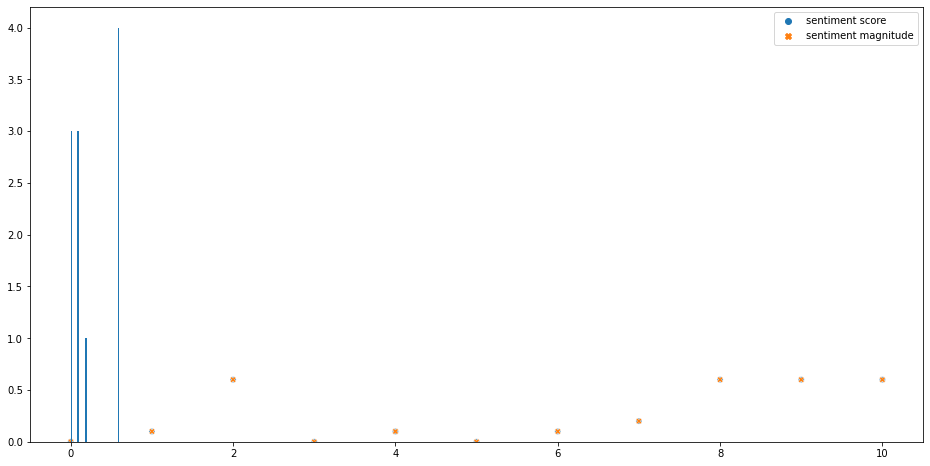

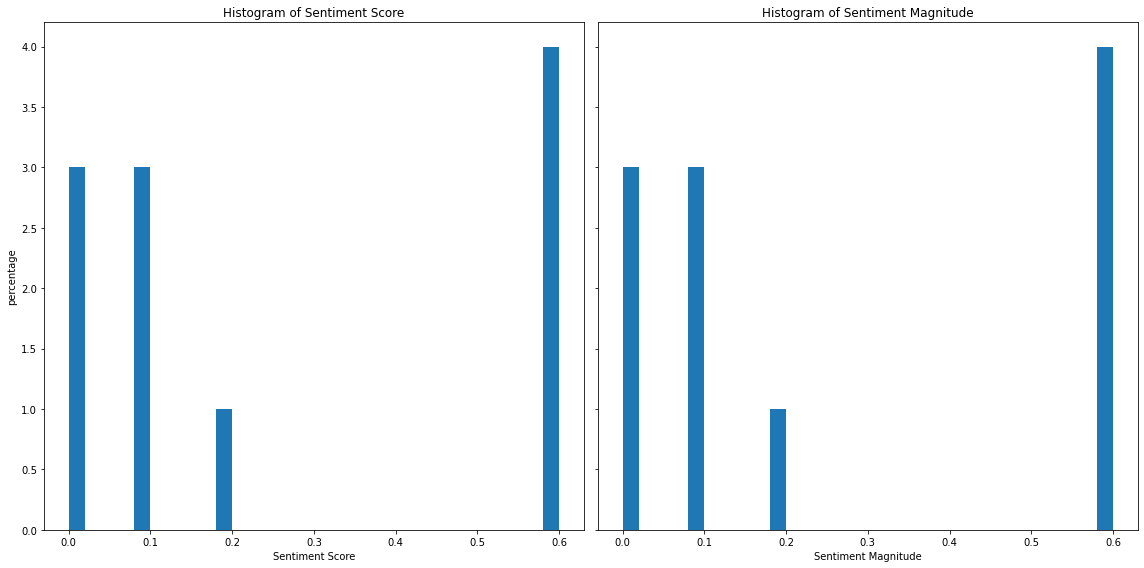

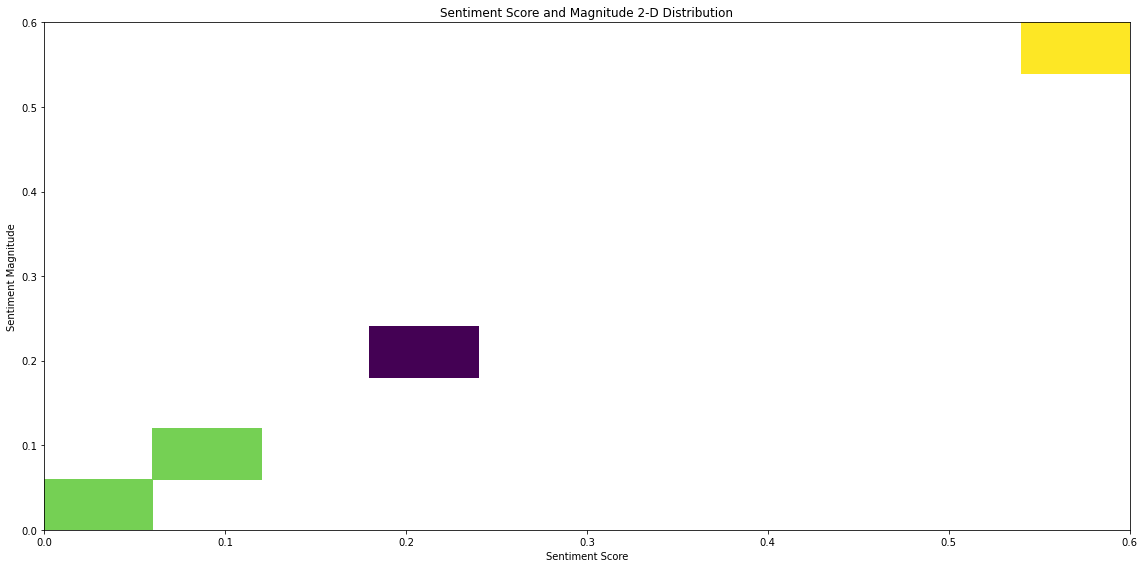

NameError: name 'strr' is not defined

<Figure size 1152x576 with 0 Axes>

In [72]:
docContent = read_document("DB News Article")
#print(docContent)
#analyze(docContent)

#analyze_text_sentiment(docContent)

#gcp_analyze_syntax(docContent)

#text_syntax=gcp_analyze_syntax(docContent)
#df_syntax = pd.DataFrame(text_syntax)
#df_syntax

#entities=gcp_analyze_entities(docContent)
#df_entities = pd.DataFrame(entities)
#df_entities

sentence_sentiment = analyze_text_sentiment(docContent)
df_sentiment = pd.DataFrame(sentence_sentiment)
#df_sentiment
strrr = gcp_plot_sentiments(df_sentiment)
strr
response = gcp_classify_text(docContent)
print(response)

In [ ]:
print("hi")